Part B

B1. Dataset and Setup

libraries

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

In [91]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url =  "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

In [92]:
df_train = pd.read_csv(train_url, names=columns, skipinitialspace=True)

In [93]:
df_test = pd.read_csv(test_url, names=columns, skipinitialspace=True, skiprows=1)

Combine Data (train + test)

In [94]:
df = pd.concat([df_train, df_test], ignore_index=True)
df["income"] = df["income"].str.replace(".", "", regex=False)

In [95]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [96]:
df.describe() #ehna bnswf elnumerical variables man2der4 newsf el cataegorical variable

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [98]:
df.shape

(48842, 15)

In [99]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [100]:
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [101]:
df["income"].value_counts(normalize=True) * 100

income
<=50K    76.071823
>50K     23.928177
Name: proportion, dtype: float64

• Handle missing values by treating them as a separate category

In [102]:
(df[columns] == '?').sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [103]:
df = df.replace("?", "Unknown")

• Select relevant categorical features

In [104]:
categorical_features = [
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"
]

In [105]:
df[categorical_features].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64

In [106]:
target = "income"

df_candt = df[categorical_features + [target]]

In [107]:
df_candt.head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


• Encode categories as integers while maintaining interpretability

In [108]:
def encode_column(col):
    unique_vals = df[col].unique()
    mapping = {val: i for i, val in enumerate(unique_vals)}
    return df[col].map(mapping), mapping

mapping

In [109]:
encoders = {}
for col in categorical_features + [target]:
    df[col], encoders[col] = encode_column(col)


In [110]:
for col, mapping in encoders.items():
    print(f"{col}: {mapping}")

workclass: {'State-gov': 0, 'Self-emp-not-inc': 1, 'Private': 2, 'Federal-gov': 3, 'Local-gov': 4, 'Unknown': 5, 'Self-emp-inc': 6, 'Without-pay': 7, 'Never-worked': 8}
education: {'Bachelors': 0, 'HS-grad': 1, '11th': 2, 'Masters': 3, '9th': 4, 'Some-college': 5, 'Assoc-acdm': 6, 'Assoc-voc': 7, '7th-8th': 8, 'Doctorate': 9, 'Prof-school': 10, '5th-6th': 11, '10th': 12, '1st-4th': 13, 'Preschool': 14, '12th': 15}
marital-status: {'Never-married': 0, 'Married-civ-spouse': 1, 'Divorced': 2, 'Married-spouse-absent': 3, 'Separated': 4, 'Married-AF-spouse': 5, 'Widowed': 6}
occupation: {'Adm-clerical': 0, 'Exec-managerial': 1, 'Handlers-cleaners': 2, 'Prof-specialty': 3, 'Other-service': 4, 'Sales': 5, 'Craft-repair': 6, 'Transport-moving': 7, 'Farming-fishing': 8, 'Machine-op-inspct': 9, 'Tech-support': 10, 'Unknown': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14}
relationship: {'Not-in-family': 0, 'Husband': 1, 'Wife': 2, 'Own-child': 3, 'Unmarried': 4, 'Other-rela

• Create 70/15/15 train/validation/test split

In [111]:
X = df[categorical_features]
y = df[target]

In [112]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

• Analyze class distributions and feature-target relationships

In [113]:
y.value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

In [114]:
y.value_counts(normalize=True) * 100

income
0    76.071823
1    23.928177
Name: proportion, dtype: float64

Class Distribution:
The target variable (income) is imbalanced, with approximately 76% of samples belonging to the <=50K class and 24% belonging to the >50K class. This imbalance should be considered during evaluation because a classifier can appear accurate simply by predicting the majority class.

In [115]:
for col in categorical_features:
    ratio = df.groupby(col)[target].mean().mean() * 100
    print(f"{col}: average >50K ratio = {ratio:.2f}%")

workclass: average >50K ratio = 24.39%
education: average >50K ratio = 23.06%
marital-status: average >50K ratio = 17.32%
occupation: average >50K ratio = 21.04%
relationship: average >50K ratio = 18.81%
race: average >50K ratio = 17.68%
sex: average >50K ratio = 20.65%
native-country: average >50K ratio = 20.63%


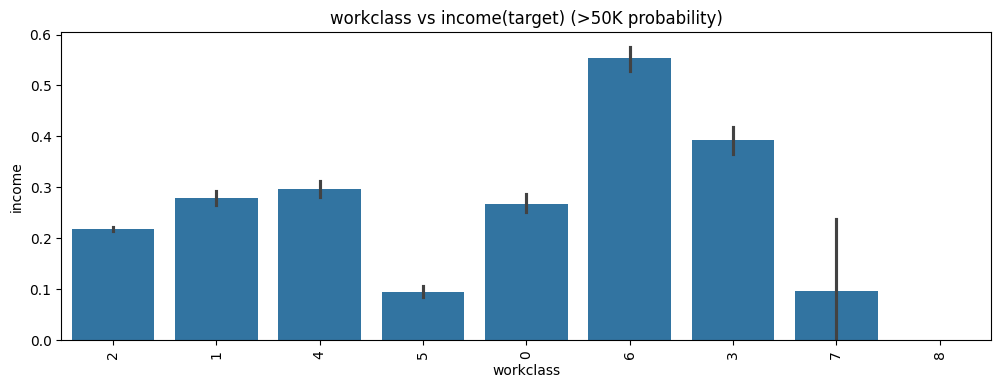

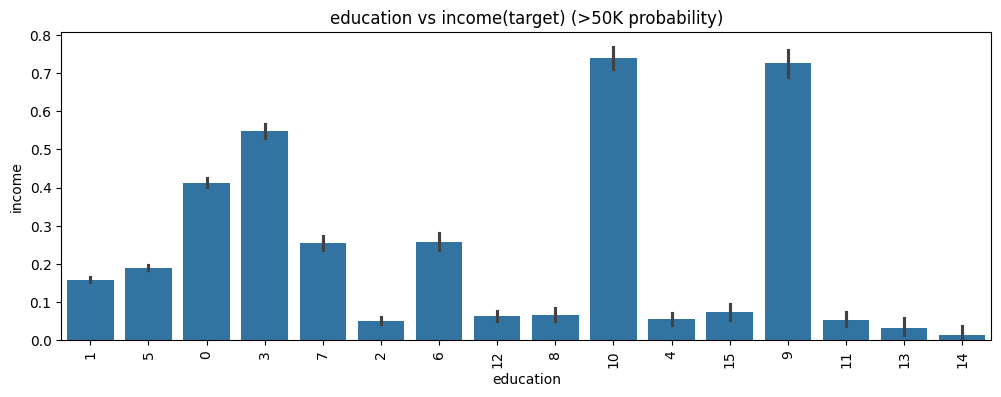

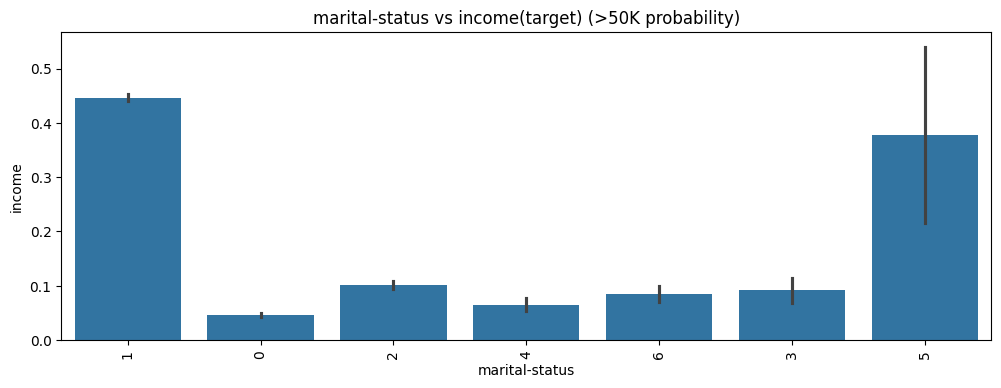

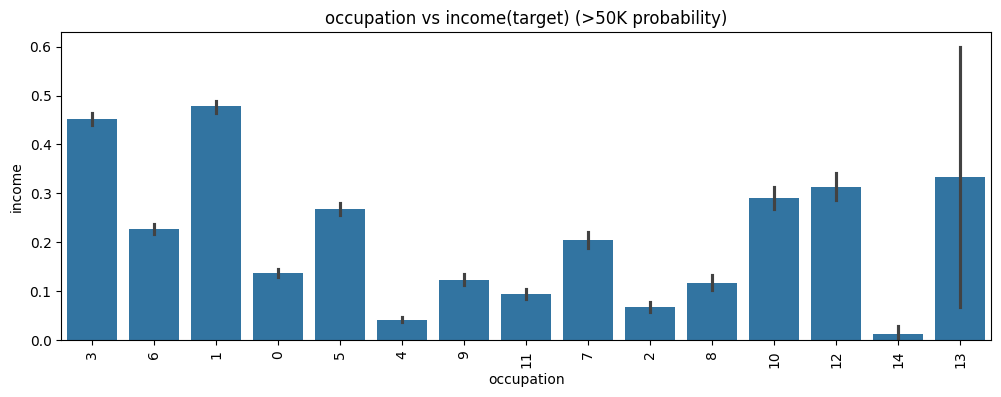

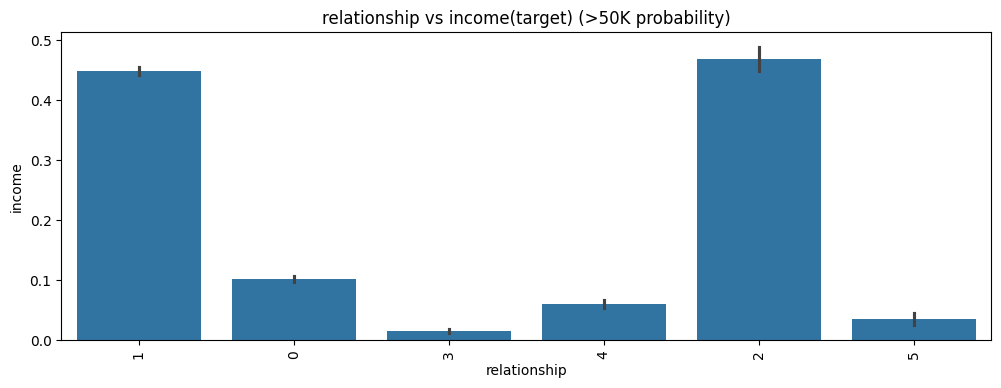

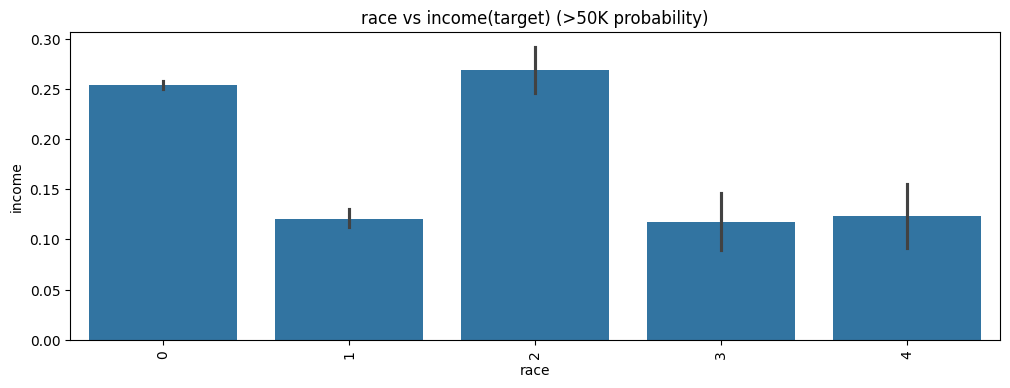

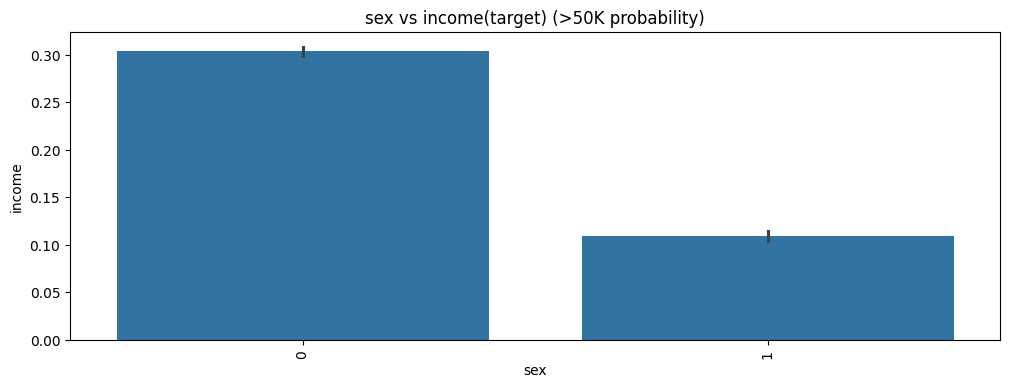

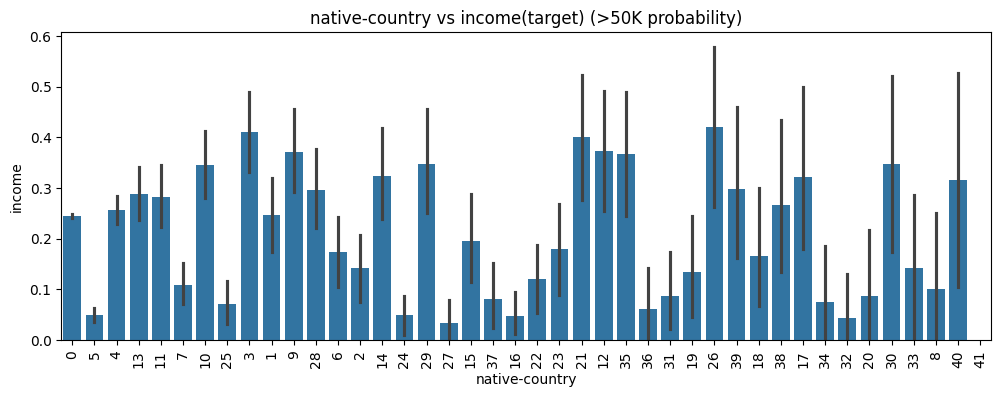

In [116]:
for col in categorical_features:
    plt.figure(figsize=(12, 4))
    sns.barplot(x=df[col], y=df[target], estimator=np.mean, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col} vs income(target) (>50K probability)")
    plt.show()


From the barplots, it is clear that some categorical features are more related to income than others.
For example:

People with higher education levels (such as Bachelors or Masters) have a higher chance of earning >50K, while lower education levels (like HS-grad or 11th) mostly fall into the <=50K group.

Some job types also show a strong effect. Jobs like Exec-managerial and Prof-specialty have more people earning >50K, while jobs such as Handlers-cleaners have much lower income levels.

Marital-status is a strong factor as well. Married-civ-spouse has a much higher proportion of high-income individuals, while Never-married has mostly low-income.

Overall, the categorical features clearly affect income, but some of them are related to each other (for example, education and occupation), which means they do not fully satisfy the independence assumption of Naïve Bayes.

-----------------------------------------------

B2. Naïve Bayes Implementation

Class prior

In [117]:
prior_0 = (y_train == 0).mean()  
prior_1 = (y_train == 1).mean() 

In [118]:
prior_0

np.float64(0.7607125098715961)

In [119]:
prior_1

np.float64(0.23928749012840386)

Likelihood Function with Laplace Smoothing

In [137]:
def compute_likelihoods(X, y, alpha=1):
    likelihoods = {}   
    
    for col in X.columns:
        likelihoods[col] = {}
        values = X[col].unique()
        
        for c in [0, 1]:
            
            X_c = X[y == c][col]
            
            counts = X_c.value_counts().reindex(values, fill_value=0)
            
            probs = (counts + alpha) / (counts.sum() + alpha * len(values))
            
            likelihoods[col][c] = probs.to_dict()
    
    return likelihoods

likelihoods = compute_likelihoods(X_train, y_train, alpha=1)

Posterior Probability

In [121]:
def predict_full_single(x, likelihoods, prior_0, prior_1):
    # log priors
    log_p0 = np.log(prior_0)
    log_p1 = np.log(prior_1)

    # add log likelihoods
    for col in x.index:
        val = x[col]
        log_p0 += np.log(likelihoods[col][0].get(val, 1e-9))
        log_p1 += np.log(likelihoods[col][1].get(val, 1e-9))

    # convert to probabilities (log-sum-exp trick)
    max_log = max(log_p0, log_p1)
    p0 = np.exp(log_p0 - max_log)
    p1 = np.exp(log_p1 - max_log)
    total = p0 + p1

    prob_0 = p0 / total
    prob_1 = p1 / total

    pred = 1 if prob_1 > prob_0 else 0

    return pred, prob_0, prob_1


predict Fucntion

In [122]:
def predict_full(X, likelihoods, prior_0, prior_1):
    preds = []
    probs_0 = []
    probs_1 = []

    for i in range(len(X)):
        pred, p0, p1 = predict_full_single(
            X.iloc[i], likelihoods, prior_0, prior_1
        )
        preds.append(pred)
        probs_0.append(p0)
        probs_1.append(p1)

    return np.array(preds), np.array(probs_0), np.array(probs_1)


Evaluate on validation set

In [123]:
y_val_pred, y_val_p0, y_val_p1 = predict_full(
    X_val, likelihoods, prior_0, prior_1
)

accuracy = (y_val_pred == y_val.values).mean()
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8023478023478023


tunnig for laplace smoothing and get best alpha

In [136]:
def train_naive_bayes(X, y, alpha):
    
    prior_0 = (y == 0).mean()
    prior_1 = (y == 1).mean()

    likelihoods = compute_likelihoods(X, y, alpha)
    
    return prior_0, prior_1, likelihoods


In [125]:
alpha_values = [0.1, 0.5, 1, 2, 5]
val_results = {}

for alpha in alpha_values:
    print(f"\nTesting alpha = {alpha}")

    prior_0, prior_1, likelihoods = train_naive_bayes(X_train, y_train, alpha)

    y_val_pred, y_val_p0, y_val_p1 = predict_full(
    X_val, likelihoods, prior_0, prior_1
)
    acc = (y_val_pred == y_val.values).mean()

    val_results[alpha] = acc
    print(f"Validation Accuracy: {acc:.4f}")


Testing alpha = 0.1
Validation Accuracy: 0.8023

Testing alpha = 0.5
Validation Accuracy: 0.8023

Testing alpha = 1
Validation Accuracy: 0.8023

Testing alpha = 2
Validation Accuracy: 0.8019

Testing alpha = 5
Validation Accuracy: 0.8014


In [126]:
print("\nValidation Results")
for alpha, acc in val_results.items():
    print(f"alpha={alpha}: accuracy={acc:.4f}")

best_alpha = max(val_results, key=val_results.get)
print(f"\nBest alpha value is: {best_alpha}")



Validation Results
alpha=0.1: accuracy=0.8023
alpha=0.5: accuracy=0.8023
alpha=1: accuracy=0.8023
alpha=2: accuracy=0.8019
alpha=5: accuracy=0.8014

Best alpha value is: 0.1


-----------------------------------------------------------------------

B3. Analysis and Evalutation

In [127]:
X_final_train = pd.concat([X_train, X_val], axis=0)
y_final_train = pd.concat([y_train, y_val], axis=0)

print("Final train shape:", X_final_train.shape)
print("Test shape:", X_test.shape)

Final train shape: (41515, 8)
Test shape: (7327, 8)


In [128]:
prior_0 = (y_final_train == 0).mean()
prior_1 = (y_final_train == 1).mean()

print("P(Y=0):", prior_0)
print("P(Y=1):", prior_1)

final_likelihoods = compute_likelihoods(X_final_train, y_final_train, alpha=best_alpha)

print("Final Naive Bayes model trained with alpha =", best_alpha)


P(Y=0): 0.7607129953029026
P(Y=1): 0.23928700469709743
Final Naive Bayes model trained with alpha = 0.1


In [129]:
y_test_pred, y_test_p0, y_test_p1 = predict_full(X_test, final_likelihoods, prior_0, prior_1)

In [130]:
test_acc = (y_test_pred == y_test.values).mean()

In [131]:
print("Test Accuracy:", test_acc)

Test Accuracy: 0.7966425549338064


• Feature Selection: Analyze impact of different feature subsets

In [132]:
feature_sets = {
    "All features": categorical_features,
    "Strong subset": ["education", "occupation", "marital-status"],
    "Single feature: education": ["education"],
    "Single feature: marital-status": ["marital-status"]
}

subset_results = {}

for name, feats in feature_sets.items():
    X_train_sub = X_final_train[feats]
    X_test_sub  = X_test[feats]

    # priors
    prior_0 = (y_final_train == 0).mean()
    prior_1 = (y_final_train == 1).mean()

    # likelihoods
    lk = compute_likelihoods(X_train_sub, y_final_train, alpha=best_alpha)

    # prediction
    preds, probs_0, probs_1 = predict_full(X_test_sub, lk, prior_0, prior_1)

    # accuracy
    acc = (preds == y_test.values).mean()
    subset_results[name] = acc

for name, acc in subset_results.items():
    print(f"{name}: accuracy = {acc:.4f}")


All features: accuracy = 0.7966
Strong subset: accuracy = 0.8226
Single feature: education: accuracy = 0.7800
Single feature: marital-status: accuracy = 0.7607


• Probability Analysis: Examine predicted probabilities distribution

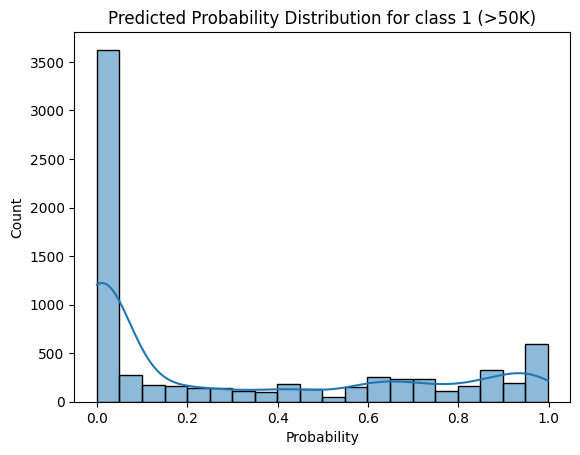

In [133]:
sns.histplot(y_test_p1, bins=20, kde=True)
plt.title("Predicted Probability Distribution for class 1 (>50K)")
plt.xlabel("Probability")
plt.show()

• Independence Assumption: Discuss violations and their impact

Independence Assumption:
Naïve Bayes assumes that the features are conditionally independent given the income class.
However, in the Adult dataset this assumption is clearly violated.
Features such as education and occupation are strongly related, marital-status is directly connected with relationship, and workclass correlates with occupation.
These dependencies cause Naïve Bayes to count the same information more than once, which affects the probability estimates.
As a result, the model becomes biased toward the majority class (<=50K) and shows lower precision and recall for the minority class (>50K).
Despite this, Naïve Bayes still achieves reasonable overall accuracy, but its performance on the high-income class is limited because the independence assumption does not hold.

Test Performance by Manual Naive Bayes

In [134]:
print(" Classification Report (Manual Naive Bayes)")
print(classification_report(y_test, y_test_pred, target_names=["<=50K", ">50K"]))
print("\n Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))

 Classification Report (Manual Naive Bayes)
              precision    recall  f1-score   support

       <=50K       0.91      0.82      0.86      5574
        >50K       0.56      0.73      0.63      1753

    accuracy                           0.80      7327
   macro avg       0.73      0.77      0.75      7327
weighted avg       0.82      0.80      0.81      7327


 Confusion Matrix
[[4557 1017]
 [ 473 1280]]


Performance Comparison: Compare with sklearn's MultinomialNB

In [135]:
sk_model = MultinomialNB(alpha=best_alpha)   
sk_model.fit(X_final_train, y_final_train)

sk_test_pred = sk_model.predict(X_test)

print(" Sklearn MultinomialNB Report ")
print(classification_report(y_test, sk_test_pred, target_names=["<=50K", ">50K"]))

print("\nSklearn Confusion Matrix")
print(confusion_matrix(y_test, sk_test_pred))


 Sklearn MultinomialNB Report 
              precision    recall  f1-score   support

       <=50K       0.77      0.98      0.86      5574
        >50K       0.47      0.06      0.11      1753

    accuracy                           0.76      7327
   macro avg       0.62      0.52      0.49      7327
weighted avg       0.70      0.76      0.68      7327


Sklearn Confusion Matrix
[[5450  124]
 [1644  109]]


Performance Comparison:
Surprisingly, the manually implemented Naïve Bayes classifier outperformed sklearn’s MultinomialNB on the Adult dataset.
This is mainly because MultinomialNB is designed for count-based features (e.g., bag-of-words), while our dataset contains categorical encoded features.
Sklearn treats the encoded integers as frequency values, which distorts the probability model and results in poor performance, especially for the minority class (>50K), where the F1-score dropped to 0.11.

In contrast, the manual implementation handled categorical features correctly and applied Laplace smoothing per category, leading to significantly better recall and F1-score for the >50K class.
Therefore, the manual Naïve Bayes model is more appropriate for this dataset than MultinomialNB.